<a href="https://colab.research.google.com/github/CelestineAkpanoko/Data-analysis-with-python/blob/main/iQubeLabs/Regression_Analysis_on_BTC_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
# Initial Importations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
palette=sns.color_palette('mako')
sns.set(palette=palette)

data = '/content/drive/MyDrive/Colab Notebooks/iQube Labs Research/BTCUSDT_1h.csv'

In [82]:
df = pd.read_csv(data)
df_copy = df.copy()
df.head()

,open,high,low,close,volume,close_time,quote,takers_buy_base,takers_buy_quote
0,4261.48,4313.62,4261.32,4308.83,47.181009,2017-08-16 23:59:59.999000-05:00,202366.138393,35.160503,150952.477943
1,4308.83,4328.69,4291.37,4315.32,23.234916,2017-08-17 00:59:59.999000-05:00,100304.823567,21.448071,92608.279728
2,4330.29,4345.45,4309.37,4324.35,7.229691,2017-08-17 01:59:59.999000-05:00,31282.312670,4.802861,20795.317224
3,4316.62,4349.99,4287.41,4349.99,4.443249,2017-08-17 02:59:59.999000-05:00,19241.058300,2.602292,11291.347015
4,4333.32,4377.85,4333.32,4360.69,0.972807,2017-08-17 03:59:59.999000-05:00,4239.503586,0.814655,3552.746817


The dataset depicts an hour price range on Bitcoin, and it consist of the following columns: open, high, low, close, volume, close_time, quote, takers_buy_base, and takers_buy_quote. The purpose of analysing this dataset is to visualize the price ranges over the years and to make predictions based on the previous price information. 

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38461 entries, 0 to 38460
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   open              38461 non-null  float64
 1   high              38461 non-null  float64
 2   low               38461 non-null  float64
 3   close             38461 non-null  float64
 4   volume            38461 non-null  float64
 5   close_time        38461 non-null  object 
 6   quote             38461 non-null  float64
 7   takers_buy_base   38461 non-null  float64
 8   takers_buy_quote  38461 non-null  float64
dtypes: float64(8), object(1)
memory usage: 2.6+ MB


In [48]:
df.describe()

,open,high,low,close,volume,quote,takers_buy_base,takers_buy_quote
count,38461.000000,38461.000000,38461.000000,38461.000000,38461.000000,3.846100e+04,38461.000000,3.846100e+04
mean,17589.002805,17696.560219,17473.314191,17589.962025,2101.814189,4.369855e+07,1046.701701,2.159233e+07
std,17359.685254,17463.372583,17249.006318,17359.989729,2175.337360,7.080532e+07,1066.267302,3.481741e+07
min,2870.900000,2950.000000,2817.000000,2919.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,6726.000000,6752.760000,6695.490000,6726.110000,919.149470,7.125238e+06,470.170524,3.665090e+06
50%,9298.330000,9339.370000,9259.980000,9298.750000,1536.182670,1.545427e+07,773.216614,7.739254e+06
75%,19024.330000,19125.760000,18900.000000,19026.490000,2571.497519,5.187811e+07,1279.230445,2.529690e+07
max,68635.120000,69000.000000,68451.190000,68633.690000,47255.762685,1.514465e+09,20628.794047,6.849674e+08


# Cleaning and EDA

In [49]:
# Checking for the number of empty values
df.isna().sum()

open                0
high                0
low                 0
close               0
volume              0
close_time          0
quote               0
takers_buy_base     0
takers_buy_quote    0
dtype: int64

In [50]:
# Check the close time range
df['close_time'].min(), df['close_time'].max()

('2017-08-16 23:59:59.999000-05:00', '2022-01-10 17:59:59.999000-05:00')

In [83]:
# Converting close_time column to datetime and remove localization
df['close_time'] = pd.to_datetime(df['close_time'])
df['close_time'] = df['close_time'].dt.tz_localize(None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38461 entries, 0 to 38460
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   open              38461 non-null  float64       
 1   high              38461 non-null  float64       
 2   low               38461 non-null  float64       
 3   close             38461 non-null  float64       
 4   volume            38461 non-null  float64       
 5   close_time        38461 non-null  datetime64[ns]
 6   quote             38461 non-null  float64       
 7   takers_buy_base   38461 non-null  float64       
 8   takers_buy_quote  38461 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 2.6 MB


In [84]:
# Getting the months across the years
import calendar
df['month'] = df['close_time'].dt.month
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])
df['month'].value_counts()

Oct    3717
Dec    3716
Sep    3591
Nov    3588
Aug    3325
Jan    3209
Jul    2969
Mar    2968
May    2966
Apr    2873
Jun    2866
Feb    2673
Name: month, dtype: int64

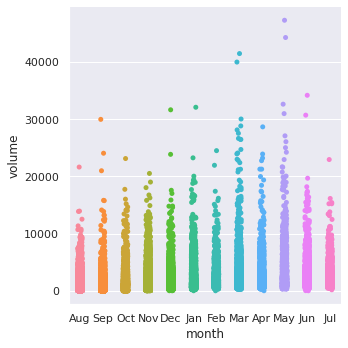

In [92]:
sns.catplot(data=df, x='month', y='volume')
plt.show()

From the visualization, we can see that for over 5 years (2017 - 2022), the month of May has had the highest BTC volume circulation. August has been the month with the lowest volume circulation. 

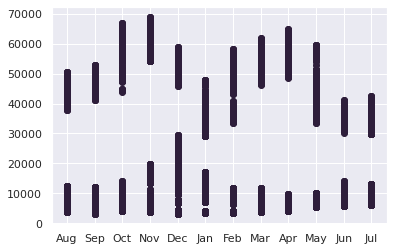

In [97]:
x = df['month']
y = df['high']
# sns.scatterplot(data=df, x='month', y='high')
plt.plot(x,y, 'o')
plt.show()

From the plot, we can see that the ATH (All Time High) price has broke 60 thousand dollars milestone in 5 different months; October, November, March, April, and June. The ATH price over the 5 years is $70k. 

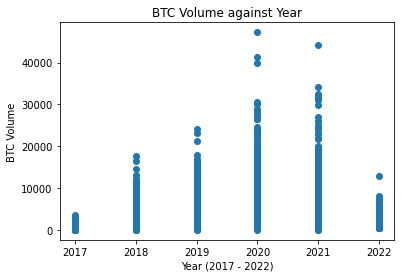

In [24]:
# Visualizing btc volume across the years (2017 -2022)
y = df['volume']
x = df['close_time_months'] = df['close_time'].dt.strftime('%Y')
plt.xlabel('Year (2017 - 2022)')
plt.ylabel('BTC Volume')
plt.title('BTC Volume against Year')
plt.plot(x, y,'o')
plt.show()

The plot above depicts BTC volume over the years, ranging from 2017 to 2022. From the plot, we can see that 2020 has the highest volume of BTC circulated. Although, the volume of BTC in 2022 in this dataset ends in January. 

# Supervised Learning: Regression

In [100]:
# Setup target and features
from sklearn.model_selection import train_test_split
target = df['high']
features = df[['open', 'close', 'low', 'volume']]

X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle=True, test_size=0.25)

In [107]:
# Build model
from sklearn.ensemble import RandomForestRegressor

btc_model = RandomForestRegressor(random_state=3)

btc_model = btc_model.fit(X_train, y_train)

Now, let's predict and validate our prediction with mean squared error.

In [108]:
from sklearn.metrics import mean_squared_error
y_pred = btc_model.predict(X_test)
print(mean_squared_error(y_test, y_pred))

5985.708686804046


## Fine-tuning

In [119]:
target = df['high']
features = df[['open', 'close', 'low', 'volume', 'takers_buy_base', 'takers_buy_quote', 'quote']]

X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle=True, test_size=0.30)

In [146]:
btc_model = RandomForestRegressor(random_state=0, max_samples=20000, max_depth=2000, max_leaf_nodes=50000)

btc_model = btc_model.fit(X_train, y_train)
y_pred = btc_model.predict(X_test)
print(mean_squared_error(y_test, y_pred))

5980.860959109816
